# processing audio files

Bush Point: https://www.orcasound.net/portfolio/bush-point-hydrophone/
Next steps: gather more info at this point as proposed in jamboard...

In [17]:
import os , glob
import pandas as pd
import xarray as xr
import s3fs, boto3, botocore
import geoviews as gv
from cartopy import crs
import time

In [8]:
basepath = 'data/'

# Orcasound data sources: 
https://github.com/orcasound/orcadata/wiki

In [2]:
s3 = s3fs.S3FileSystem(anon=True)
files = s3.ls('streaming-orcasound-net/')

In [3]:
bucket_name = 'streaming-orcasound-net'

In [4]:
client = boto3.client('s3',config=botocore.client.Config(signature_version=botocore.UNSIGNED))

In [5]:
paginator = client.get_paginator('list_objects')
result = paginator.paginate(Bucket=bucket_name, Delimiter='/')

In [6]:
for prefix in result.search('CommonPrefixes'):
    print(prefix.get('Prefix'))

rpi_bush_point/
rpi_mast_center/
rpi_north_sjc/
rpi_orcasound_lab/
rpi_port_townsend/
rpi_sunset_bay/


In [7]:
s3.ls(s3.ls(s3.ls(files[0])[1])[1])

['streaming-orcasound-net/rpi_bush_point/hls/1539203407/',
 'streaming-orcasound-net/rpi_bush_point/hls/1539203407/live.m3u8',
 'streaming-orcasound-net/rpi_bush_point/hls/1539203407/live000.ts',
 'streaming-orcasound-net/rpi_bush_point/hls/1539203407/live001.ts',
 'streaming-orcasound-net/rpi_bush_point/hls/1539203407/live002.ts',
 'streaming-orcasound-net/rpi_bush_point/hls/1539203407/live003.ts',
 'streaming-orcasound-net/rpi_bush_point/hls/1539203407/live004.ts',
 'streaming-orcasound-net/rpi_bush_point/hls/1539203407/live005.ts',
 'streaming-orcasound-net/rpi_bush_point/hls/1539203407/live006.ts',
 'streaming-orcasound-net/rpi_bush_point/hls/1539203407/live007.ts',
 'streaming-orcasound-net/rpi_bush_point/hls/1539203407/live008.ts',
 'streaming-orcasound-net/rpi_bush_point/hls/1539203407/live009.ts',
 'streaming-orcasound-net/rpi_bush_point/hls/1539203407/live010.ts',
 'streaming-orcasound-net/rpi_bush_point/hls/1539203407/live011.ts',
 'streaming-orcasound-net/rpi_bush_point/hls/

In [33]:
client.download_file(
    Bucket=bucket_name,
    Key='rpi_bush_point/hls/1539203407/live000.ts',
    Filename='data/archive-orcasound-net-lab/f.ts'
)

# Convert ts file to mp4

In [20]:
from pydub import AudioSegment
import ffmpeg

In [37]:
ffmpeg.input(input_file).output(output_file).run()

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.3.0 (conda-forge gcc 12.3.0-0)
  configuration: --prefix=/opt/conda --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1687154882217/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1687154882217/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1687154882217/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1687154882217/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-libass --enable-pthreads --enable-vaapi --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-sta

(None, None)

## Build spectrogram from wav file...

In [45]:
from soundscape_IR.soundscape_viewer import audio_visualization

/home/jovyan/ohw23-proj-pamproject/soundscape_IR/soundscape_viewer/utility.py:333: RuntimeWarning: divide by zero encountered in log10
  data = 10*np.log10(np.abs(P)/np.power(P_ref,2))-sensitivity
/home/jovyan/ohw23-proj-pamproject/soundscape_IR/soundscape_viewer/utility.py:345: RuntimeWarning: invalid value encountered in multiply
  ambient=data[:,0:1]*0


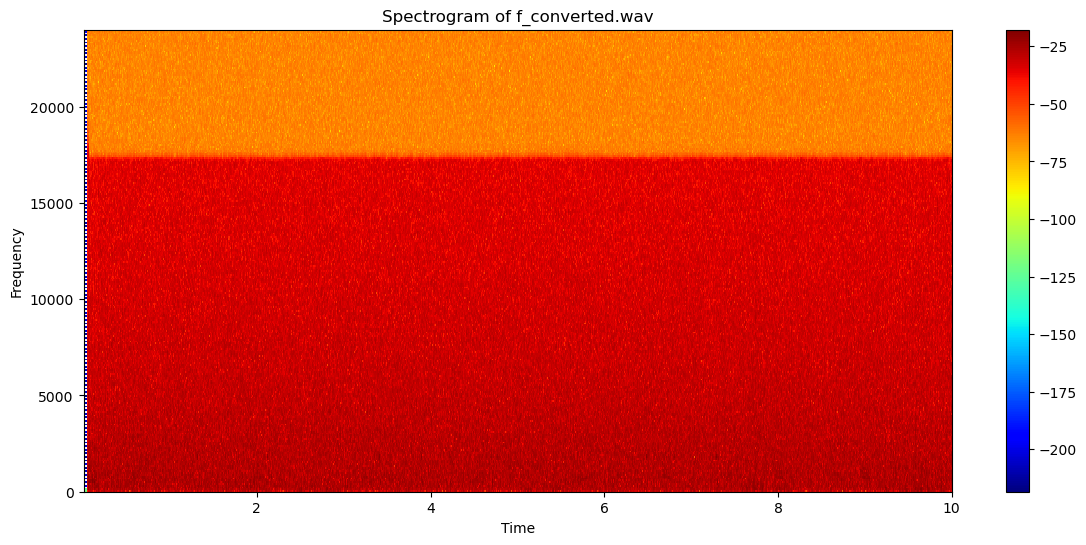

In [46]:
spec = audio_visualization(filename='f_converted.wav', path='./data/archive-orcasound-net-lab/')

## Looping & downloading all data

In [11]:
'/'.join(file_paths[0].split('/')[1:])

'rpi_bush_point/hls/1539203407/live000.ts'

In [10]:
file_paths = [f for f in s3.ls('streaming-orcasound-net/rpi_bush_point/hls/1539203407/') if '.ts' in f]

In [16]:
for fp in file_paths:
    client.download_file(
        Bucket=bucket_name,
        Key='/'.join(fp.split('/')[1:]),
        Filename=f"data/archive-orcasound-net-lab/rpi_bush_point/{fp.split('/')[-1]}"
    )
    time.sleep(0.5)

In [21]:
f = glob.glob('data/archive-orcasound-net-lab/rpi_bush_point/*')
for input_file in f:
    # convert to wav files for all
    output_file = os.path.join('data/archive-orcasound-net-lab/rpi_bush_point_wav/', 
                              f"{input_file.split('/')[-1][:-3]}.wav")
    ffmpeg.input(input_file).output(output_file).run()
    time.sleep(0.5)

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.3.0 (conda-forge gcc 12.3.0-0)
  configuration: --prefix=/opt/conda --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1687154882217/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1687154882217/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1687154882217/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1687154882217/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-libass --enable-pthreads --enable-vaapi --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-sta